<div style=
"background-image: url('https://imgk.timesnownews.com/story/1569653930-Credit_Card.jpg?tr=w-600,h-450,fo-auto');
background-size: 100% 100%;
font-size:300%;">

<strong><br><br><br><br><br><br><br><br><br><em>CREDIT  CARD  CUSTOMERS  SEGMENTATION</em><br><br></strong>
</div>

###  BUSINESS CONTEXT:
  This case requires to develop a customer segmentation to define marketing strategy. 
  
  The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. 
  
  The file is at a customer level with 18 behavioral variables. 

###  Data Availability
The given dataset is in **.csv** format

###  Problems need to address :

**Data preparation:** To build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
* Monthly average purchase and cash advance amount
* Purchases by type (one-off, installments)
* Average amount per purchase and cash advance transaction,
* Limit usage (balance to credit limit ratio),
* Payments to minimum payments ratio etc.

**Advanced reporting:** 
* to gain insight on the customer profiles using the derived KPIs 
* Identification of the relationships/ affinities between services.**
* Applying  a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioural segments of credit card holders



<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
 Importing Libraries
<br><br></strong></div>


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import os
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [60]:
from datetime import datetime,timedelta
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
Importing Dataset
<br><br></strong></div>
 

In [5]:
import os
os.chdir("C:\\Users\\user\\Desktop\\Alab_Python\\Final Projects in Python\\4. Segmentation of Credit Card Customers")

In [6]:
credit=pd.read_csv("CC_GENERAL.csv")
print(credit.shape)
credit.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

<div class='alert alert-success'><strong>DATA DICTIONARY:</strong>
<br>CUST_ID: <tt>Credit card holder ID</tt>
<br>BALANCE:<tt> Monthly average balance (based on daily balance averages)</tt>
<br>BALANCE_FREQUENCY:<tt> Ratio of last 12 months with balance</tt>
<br>PURCHASES: <tt>Total purchase amount spent during last 12 months</tt>
<br>ONEOFF_PURCHASES: <tt>Total amount of one-off purchases</tt>
<br>INSTALLMENTS_PURCHASES: <tt>Total amount of installment purchases</tt>
<br>CASH_ADVANCE:<tt> Total cash-advance amount</tt>
<br>PURCHASES_ FREQUENCY: <tt>Frequency of purchases (Percent of months with at least one purchase)</tt>
<br>ONEOFF_PURCHASES_FREQUENCY: <tt>Frequency of one-off-purchases</tt>
<br>PURCHASES_INSTALLMENTS_FREQUENCY: <tt>Frequency of installment purchases</tt>
<br>CASH_ADVANCE_ FREQUENCY:<tt> Cash-Advance frequency</tt>
<br>AVERAGE_PURCHASE_TRX: <tt>Average amount per purchase transaction</tt>
<br>CASH_ADVANCE_TRX: <tt>Average amount per cash-advance transaction</tt>
<br>PURCHASES_TRX: <tt>Average amount per purchase transaction</tt>
<br>CREDIT_LIMIT: <tt>Credit limit</tt>
<br>PAYMENTS:<tt> Total payments (due amount paid by the customer to decrease their statement balance) in the period</tt>
<br>MINIMUM_PAYMENTS: <tt>Total minimum payments due in the period.</tt>
<br>PRC_FULL_PAYMEN:<tt> Percentage of months with full payment of the due statement balance</tt>
<br>TENURE:<tt> Number of months as a customer</tt></div>


In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
Data Audit Report
<br><br></strong></div>

In [9]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [10]:
## Missing value Check
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
print(">>Columns having missing values:\n")
missing_ser=credit.isnull().sum()
for x in missing_ser.iloc[missing_ser.nonzero()].index: print(x)

>>Columns having missing values:

CREDIT_LIMIT
MINIMUM_PAYMENTS


In [12]:
#replacing missing values with median of corresponding columns

credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)

credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Handling Outliers

In [13]:
#Handling Outliers of continuous variables

conti_cols=credit.drop('CUST_ID',axis=1).columns
credit[conti_cols]=credit[conti_cols].apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

In [14]:
credit=pd.concat([credit['CUST_ID'],credit[conti_cols]],axis=1)
credit.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12.0,7500.0,622.066742,627.284787,0.000000,12


<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
Creating new KPIs
<br><br></strong></div>


<div class='alert alert-warning'><strong>KPI:</strong><tt>Key Performance Indicator</tt><br> <strong>New KPIs to be created:</strong>
<tt><br> 1.Monthly average purchase and cash advance amount<br> 2.Purchases by type (one-off, installments)<br> 3.Limit usage (balance to credit limit ratio),<br> 4.Payments to minimum payments ratio etc. </tt></div>

In [15]:
credit.shape

(8950, 18)

### new_KPI-1: Monthly average purchase and cash advance amount

In [16]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [17]:
credit.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000


### new_KPI-2: Purchases by type (one-off, installments)

In [18]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].sample(6)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
4654,0.00,0.00
1163,0.00,0.00
1873,45.65,300.01
1852,820.42,0.00
6660,1130.60,0.00
1515,1774.46,0.00


#### Now  we are to find out how many types of customers are there who purchase only one-off, only installment, both or none!

In [19]:
#### UDF to find Purchase type
def find_type(credit):   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [20]:
credit['purchase_type']=credit.apply(find_type,axis=1)

In [21]:
print("-"*50)
print("No. of Customers having diffrent type of purchase")
print("-"*50)

credit['purchase_type'].value_counts()

--------------------------------------------------
No. of Customers having diffrent type of purchase
--------------------------------------------------


both           2774
installment    2260
none           2042
one_off        1874
Name: purchase_type, dtype: int64

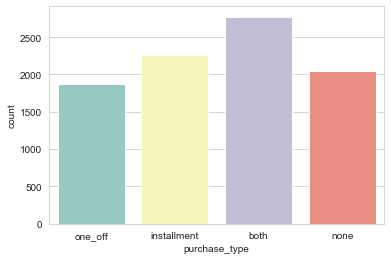

In [22]:
sns.countplot(credit['purchase_type'],
              order=['one_off','installment','both','none'],
              palette="Set3"
             );

### new_KPI-3: Limit usage (balance to credit limit ratio)

In [23]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)
#credit['limit_usage'].describe()

In [24]:
#sns.distplot(credit['limit_usage']);

### New_KPI-4:Payments to minimum payments ratio

In [25]:
credit['pay_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
#credit['pay_minpay'].describe()

In [26]:
#sns.distplot(credit['pay_minpay']);

# Plotting new KPIs

In [74]:
col_list=['Monthly_avg_purchase','Monthly_cash_advance','limit_usage','pay_minpay']
credit[col_list].isnull().sum()

Monthly_avg_purchase    0
Monthly_cash_advance    0
limit_usage             0
pay_minpay              0
dtype: int64

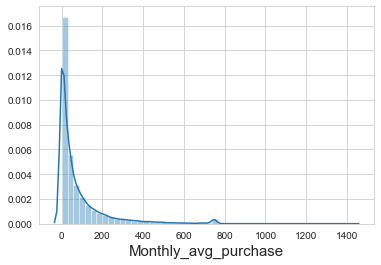

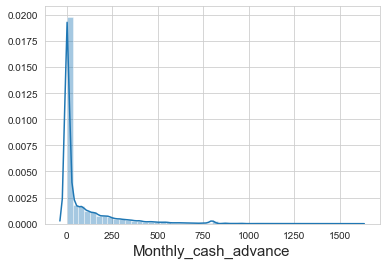

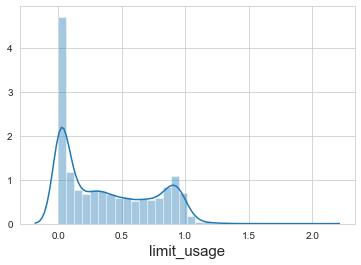

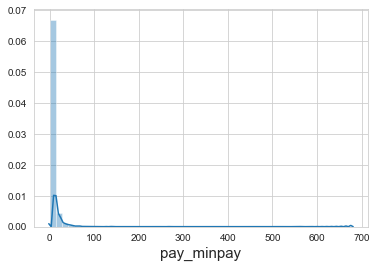

In [28]:
col_list=['Monthly_avg_purchase','Monthly_cash_advance','limit_usage','pay_minpay']
for i, col in enumerate(col_list):
    plt.figure(i)
    sns.distplot(credit[col])
    plt.xlabel(col,fontsize=15);

Clearly, These new KPIs contains outliers

## Outlier treament for new KPIs

In [29]:
col_list=['Monthly_avg_purchase','Monthly_cash_advance','limit_usage','pay_minpay']
for col in col_list:
    credit[col]=credit[col].clip_upper(credit[col].quantile(0.99))
    credit[col]=credit[col].clip_lower(credit[col].quantile(0.01)) 

<Figure size 432x288 with 0 Axes>

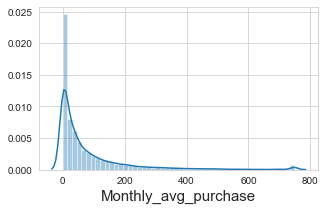

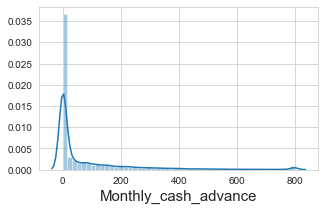

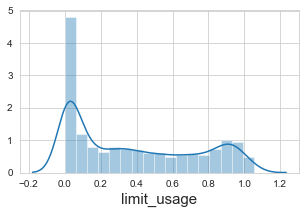

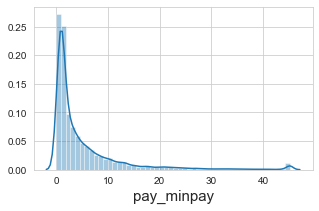

In [30]:
col_list=['Monthly_avg_purchase','Monthly_cash_advance','limit_usage','pay_minpay']
for i, col in enumerate(col_list):
    plt.figure(i)
    plt.figure(figsize=(5,3))
    sns.distplot(credit[col])
    plt.xlabel(col,fontsize=15);

<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
 Insights from new KPI's
<br><br></strong></div>


In [31]:
credit[col_list].describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_avg_purchase,8950.0,80.448360,128.990235,0.000000,3.399375,31.936667,97.228333,748.107500
Monthly_cash_advance,8950.0,83.743740,158.284750,0.000000,0.000000,0.000000,99.085196,799.013613
limit_usage,8950.0,0.384067,0.348692,0.000065,0.041450,0.301987,0.708236,1.052809
pay_minpay,8950.0,5.073413,7.588126,0.000000,0.913275,2.021399,6.013141,45.189570


In [32]:
# Average Values of KPIs for each purchse type.
c1=credit[['purchase_type','pay_minpay']].groupby('purchase_type').mean()['pay_minpay']
c2=credit.groupby('purchase_type').apply(lambda x: x['Monthly_cash_advance'].mean())
c3=credit.groupby('purchase_type').apply(lambda x: x['Monthly_avg_purchase'].mean())
c4=credit.groupby('purchase_type').apply(lambda x: x['limit_usage'].mean())

In [33]:
print("--"*35)
print("  Average Values of new KPIs for different type of customers")
print("--"*35)

pd.DataFrame({'purchase_type':['one_off', 'installment', 'both','none'],
            'payment_minpayment_ratio':[c1.one_off,c1.installment,c1.both,c1.none],
            'Monthly_cash_advance':[c2.one_off,c2.installment,c2.both,c2.none],   
            'Monthly_Purchase':[c3.one_off,c3.installment,c3.both,c3.none],
            'Limit_usage':[c4.one_off,c4.installment,c4.both,c4.none]
                }).set_index('purchase_type')


----------------------------------------------------------------------
  Average Values of new KPIs for different type of customers
----------------------------------------------------------------------


,payment_minpayment_ratio,Monthly_cash_advance,Monthly_Purchase,Limit_usage
purchase_type,,,,
one_off,5.050477,75.439023,67.249009,0.378806
installment,3.915725,36.044135,46.139936,0.267087
both,6.784852,62.018126,176.536381,0.350743
none,4.050802,173.670772,0.000000,0.563631


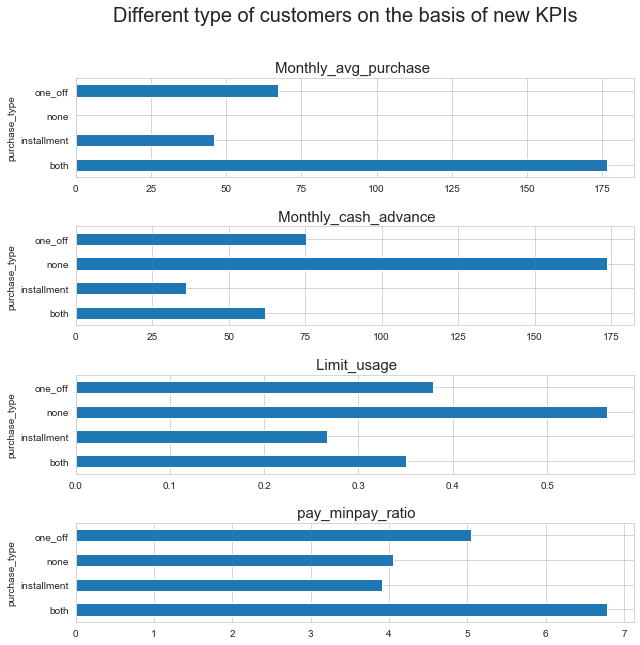

In [34]:
df=credit[['purchase_type','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','pay_minpay']]
#df.groupby('purchase_type').mean()['Monthly_avg_purchase'].plot.barh(figsize=(20,5))
#plt.ylabel('purchase_type',fontsize=15);

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(10, 10))
fig.suptitle('Different type of customers on the basis of new KPIs',fontsize=20)
fig.subplots_adjust(hspace=.5)

df.groupby('purchase_type').mean()['Monthly_avg_purchase'].plot(ax=ax1, kind='barh', grid=True)
ax1.set_title("Monthly_avg_purchase ",fontsize=15)
df.groupby('purchase_type').mean()['Monthly_cash_advance'].plot(ax=ax2, kind='barh', grid=True)
ax2.set_title(" Monthly_cash_advance",fontsize=15)
df.groupby('purchase_type').mean()['limit_usage'].plot(ax=ax3, kind='barh', grid=True)
ax3.set_title(" Limit_usage",fontsize=15)
df.groupby('purchase_type').mean()['pay_minpay'].plot(ax=ax4, kind='barh', grid=True)
ax4.set_title(" pay_minpay_ratio",fontsize=15);

<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
Data Preparation for PCA
<br><br></strong></div>


## Creating a new dataframe for analysis

In [36]:
#credit.columns

In [37]:
dropped_col_list=['CUST_ID','BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS',\
             'PRC_FULL_PAYMENT', 'TENURE']

In [38]:
df=credit.drop(dropped_col_list,axis=1)
df.shape

(8950, 14)

In [39]:
df.head(3)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,pay_minpay
0,0.818182,0.00,95.4,0.166667,0.0,0.083333,0.00,0,2.0,7.950000,0.000000,installment,0.040901,1.446508
1,0.909091,0.00,0.0,0.000000,0.0,0.000000,0.25,4,0.0,0.000000,536.912124,none,0.457495,3.826241
2,1.000000,773.17,0.0,1.000000,1.0,0.000000,0.00,0,12.0,64.430833,0.000000,one_off,0.332687,0.991682


In [40]:
df.dtypes

BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                       float64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
purchase_type                        object
limit_usage                         float64
pay_minpay                          float64
dtype: object

## Creating dummies for purchase_type column 

In [41]:
# Creating dummies for purchase_type column 
purchase_dummy=pd.get_dummies(df['purchase_type'])
purchase_dummy.head()

,both,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [42]:
# merging dummy variables with main dataframe
df=pd.concat([df,purchase_dummy],axis=1)
df.shape

(8950, 18)

In [43]:
#Dropping 'Purchase_type'column
df=df.drop('purchase_type',axis=1)
df.shape

(8950, 17)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.878083,0.234032,0.090909,0.888889,1.000000,1.000000,1.000000
ONEOFF_PURCHASES,8950.0,536.493774,1096.913512,0.000000,0.000000,38.000000,577.405000,6689.898200
INSTALLMENTS_PURCHASES,8950.0,384.498368,676.271068,0.000000,0.000000,89.000000,468.637500,3886.240500
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.134017,0.195550,0.000000,0.000000,0.000000,0.222222,0.833333
CASH_ADVANCE_TRX,8950.0,3.079330,5.523724,0.000000,0.000000,0.000000,4.000000,29.000000
PURCHASES_TRX,8950.0,14.151385,20.962159,0.000000,1.000000,7.000000,17.000000,116.510000
Monthly_avg_purchase,8950.0,80.448360,128.990235,0.000000,3.399375,31.936667,97.228333,748.107500


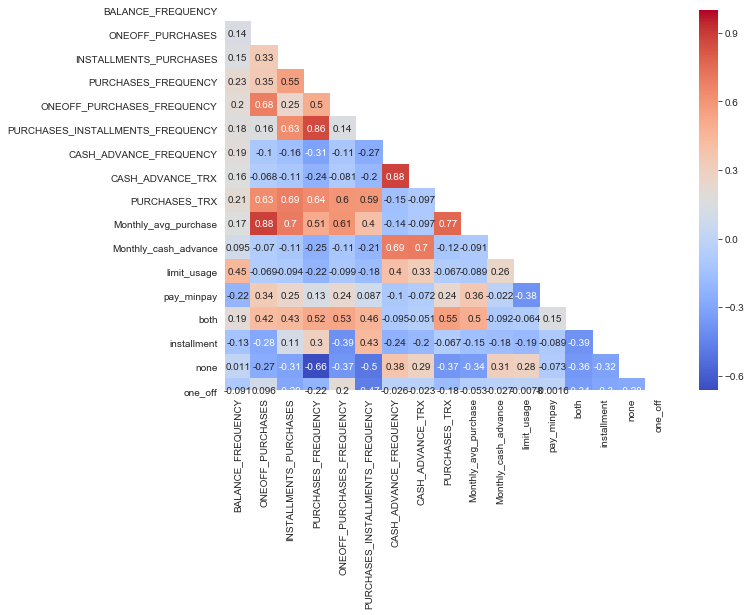

In [45]:
#sns.heatmap(df.corr())
plt.figure(figsize=(10,7))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',mask=matrix);

In [46]:
#finding high correlations
cutoff=0.90
df.corr().unstack().sort_values().where(lambda x: (abs(x)>cutoff)&(abs(x)!=1)).dropna()

Series([], dtype: float64)

So there is no such columns having correlation coeff more than 90%

In [48]:
#finding high correlations
#cutoff=0.80
#df.corr().unstack().sort_values().where(lambda x: (abs(x)>cutoff)&(abs(x)!=1)).dropna()

<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
Principal Component Analysis
<br><br></strong></div>

## Standardizing Data

In [51]:
sc=StandardScaler()

In [52]:
df_scaled=sc.fit_transform(df)

## PCA

In [54]:
var_ratio={}

for n in range(1,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)
    
var_ratio

{1: 0.3255614875850221,
 2: 0.502070364373762,
 3: 0.6286447906289514,
 4: 0.7143597584701993,
 5: 0.7839611393739014,
 6: 0.8359169061572596,
 7: 0.8707118571350897,
 8: 0.9018714427035167,
 9: 0.926414702411146,
 10: 0.9474105378336021,
 11: 0.967382406639526,
 12: 0.9796746390581899,
 13: 0.9903904721274461,
 14: 0.9968972049548616,
 15: 0.998959703332314,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

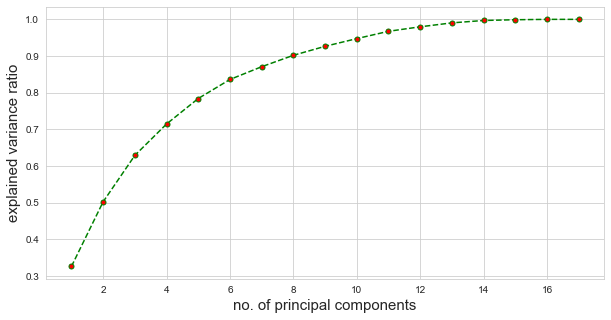

In [55]:
plt.figure(figsize=(10,5))
plt.plot(list(var_ratio.keys()),
         list(var_ratio.values()),
         color='green', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=5,
        );
plt.xlabel("no. of principal components",fontsize=15)
plt.ylabel("explained variance ratio",fontsize=15);

## Choosing no of principal components:
<div class='alert alert-success'><strong>NOTE:</strong>
 <br>* If we take n=5, almost 78% variance is explained
<br>* If we take n=6, almost 84% variance is explained</div>

In [56]:
#taking 6  components
pc_final=PCA(n_components=6).fit(df_scaled)
pc_final.explained_variance_

array([5.53516374, 3.00098621, 2.15200569, 1.45731728, 1.18335569,
       0.88334673])

In [57]:
reduced_df=pc_final.fit_transform(df_scaled)
reduced_df.shape

(8950, 6)

In [58]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=df.columns).T

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,pay_minpay,both,installment,none,one_off
PC_0,0.068765,0.282642,0.307977,0.357227,0.276231,0.309905,-0.182521,-0.152189,0.357525,0.347309,-0.151204,-0.120449,0.142207,0.285108,0.022886,-0.265990,-0.074166
PC_1,0.254756,0.228886,0.061216,-0.060638,0.210602,-0.104641,0.424433,0.417376,0.157449,0.198600,0.366616,0.286328,0.017880,0.177257,-0.354871,0.165198,0.007066
PC_2,-0.217545,0.274598,-0.201556,-0.204916,0.293737,-0.397102,-0.173053,-0.181450,-0.045661,0.112410,-0.148156,-0.179534,0.225520,-0.032397,-0.375114,-0.035850,0.474345
PC_3,-0.478656,0.030456,0.150887,-0.087980,-0.142616,0.032033,0.154366,0.194026,0.022101,0.094769,0.258841,-0.430980,0.546292,-0.036497,0.100586,0.166885,-0.238045
PC_4,-0.058277,-0.011739,-0.076184,0.223909,0.086255,0.071798,0.221020,0.297105,-0.027532,-0.032875,0.257470,-0.111530,-0.038020,-0.250741,0.319505,-0.540685,0.501500
PC_5,0.147013,0.269195,0.280146,-0.165600,-0.180038,-0.090468,-0.067612,-0.105787,0.141445,0.346508,-0.052429,0.292303,0.111130,-0.589443,0.315459,0.199921,0.126948


In [59]:
# Factor analysis
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+str(i) for i in range(6)])

PC_0    0.325561
PC_1    0.176509
PC_2    0.126574
PC_3    0.085715
PC_4    0.069601
PC_5    0.051956
dtype: float64

<div style="background-color:#9ACD32;text-align:center;font-size: 250%"><strong><br>
K-Means Clustering
<br><br></strong></div>


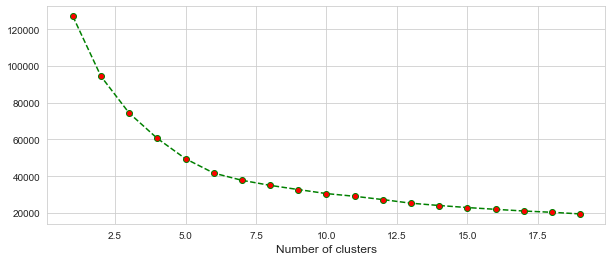

In [61]:
#Choosing k value using elbow method
sse={}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(reduced_df)
    sse[k] = kmeans.inertia_ 
    
plt.figure(figsize=(10,4))
plt.plot(list(sse.keys()), list(sse.values()), color='green', 
                                              linestyle='dashed', 
                                              marker='o',
                                              markerfacecolor='red', 
                                              markersize=6)
plt.xlabel("Number of clusters",fontsize=12);

# K-means clustering with 4 clusters

In [62]:
#K-means clustering with 4 clusters
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_df)

KMeans(n_clusters=4, random_state=123)

In [63]:
pd.Series(km_4.labels_).value_counts()

1    2428
3    2403
2    2223
0    1896
dtype: int64

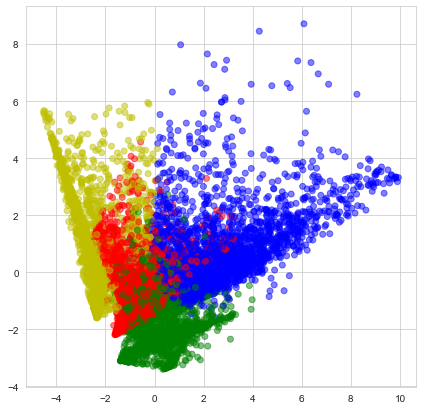

In [64]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[label] for label in km_4.labels_]

plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],
            reduced_df[:,1],
            c=label_color,
            #cmap=color_map,
            cmap='Spectral',
            alpha=0.5
           );

In [65]:
silhouette_score(reduced_df,km_4.labels_)

0.3458501915774598

In [66]:
df_pair_plot=pd.DataFrame(reduced_df,columns=['PC_' +str(i) for i in range(6)])
df_pair_plot['Cluster_k4']=km_4.labels_
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster_k4
0,-1.013159,-2.256969,-0.263624,0.163539,0.226002,0.309919,2
1,-2.941071,1.499973,-0.374943,1.016663,-0.687166,0.173886,3
2,0.777119,-0.069528,2.324720,-2.033577,1.300766,-0.310936,0
3,-0.934291,-0.608936,2.391331,-0.403537,0.822325,0.497690,0
4,-1.527332,-0.625370,1.542885,-1.776345,0.442489,0.509362,0


In [67]:
print("-"*50)
print("Average of different features for each 4 clusters")
print("-"*50)
pd.concat([df,df_pair_plot[['Cluster_k4']]],axis=1).groupby('Cluster_k4').mean().T

--------------------------------------------------
Average of different features for each 4 clusters
--------------------------------------------------


Cluster_k4,0,1,2,3
BALANCE_FREQUENCY,0.818316,0.965576,0.813883,0.896228
ONEOFF_PURCHASES,655.271471,1425.397055,2.245277,38.855293
INSTALLMENTS_PURCHASES,10.263560,924.755256,504.661347,22.735227
PURCHASES_FREQUENCY,0.320393,0.862522,0.702121,0.052498
ONEOFF_PURCHASES_FREQUENCY,0.307028,0.482826,0.001856,0.022241
PURCHASES_INSTALLMENTS_FREQUENCY,0.015088,0.691997,0.665134,0.030938
CASH_ADVANCE_FREQUENCY,0.083269,0.089786,0.036114,0.309318
CASH_ADVANCE_TRX,1.627637,2.169687,0.700855,7.344153
PURCHASES_TRX,6.346788,35.594267,11.668246,0.940491
Monthly_avg_purchase,59.670774,203.369974,44.781670,5.636739


# K-Means clustering with 5 Clusters

In [68]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5.fit(reduced_df)

KMeans(n_clusters=5, random_state=123)

In [69]:
pd.Series(km_5.labels_).value_counts()

3    2281
2    2184
1    2098
0    1731
4     656
dtype: int64

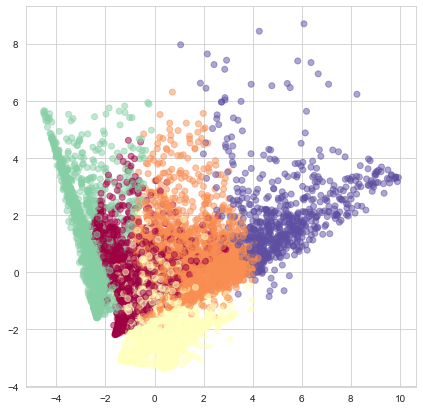

In [70]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],
            reduced_df[:,1],
            c=km_5.labels_,
            cmap='Spectral',
            alpha=0.5
           );

In [71]:
silhouette_score(reduced_df,km_5.labels_)

0.37387853096341245

In [72]:
df_pair_plot2=pd.DataFrame(reduced_df,columns=['PC_' +str(i) for i in range(6)])
df_pair_plot2['Cluster_k5']=km_5.labels_
df_pair_plot2.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster_k5
0,-1.013159,-2.256969,-0.263624,0.163539,0.226002,0.309919,2
1,-2.941071,1.499973,-0.374943,1.016663,-0.687166,0.173886,3
2,0.777119,-0.069528,2.324720,-2.033577,1.300766,-0.310936,0
3,-0.934291,-0.608936,2.391331,-0.403537,0.822325,0.497690,0
4,-1.527332,-0.625370,1.542885,-1.776345,0.442489,0.509362,0


In [73]:
print("-"*50)
print("Average of different features for each 5 clusters")
print("-"*50)
pd.concat([df,df_pair_plot2[['Cluster_k5']]],axis=1).groupby('Cluster_k5').mean().T

--------------------------------------------------
Average of different features for each 5 clusters
--------------------------------------------------


Cluster_k5,0,1,2,3,4
BALANCE_FREQUENCY,0.825858,0.935293,0.819651,0.892469,0.977440
ONEOFF_PURCHASES,646.021485,698.115915,0.000000,25.474182,3293.601049
INSTALLMENTS_PURCHASES,0.000000,549.761449,507.810748,14.832705,1745.379271
PURCHASES_FREQUENCY,0.319730,0.762531,0.704593,0.032282,0.949586
ONEOFF_PURCHASES_FREQUENCY,0.319538,0.357656,0.000000,0.013628,0.727789
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.595375,0.668408,0.018162,0.779555
CASH_ADVANCE_FREQUENCY,0.096531,0.096557,0.038094,0.304071,0.080786
CASH_ADVANCE_TRX,1.953206,2.246425,0.753663,7.159141,2.271341
PURCHASES_TRX,6.377533,21.457121,11.730087,0.572994,66.574451
Monthly_avg_purchase,57.910563,106.819217,44.686090,3.667747,441.619456
